<a href="https://colab.research.google.com/github/ekqlsrla/ESAA-2/blob/main/HW/1114_CH9_1_4_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 가이드
---

## **| 01** 추천시스템의 개요와 배경

### 1. 추천시스템의 개요

* 하나의 콘텐츠를 선택했을 때 선택된 콘텐츠와 연관된 추천 콘텐츠가 얼마나 사용자의 관심을 끌고 개인에게 맞춘 콘텐츠를 추천했는지는 그 사이트의 평판을 좌우하는 매우 중요한 요소

### 2. 온라인 스토어의 필수 요소, 추천 시스템

* 좋은 추천 시스템은 사용자가 **무엇을** 원하는지 빠르게 찾아내 사용자의 온라인 쇼핑의 즐거움을 배가 하는 것

### 3. 추천 시스템의 유형

1) 콘텐츠 기반 필터링 (Content based filtering)

2) 협업 필터링(Collaborative Filtering)
  * 최근접 이웃 협업 필터링
  * 잠재 요인 협업 필터링

---
## **| 02** 콘텐츠 기반 필터링 추천 시스템

1. 콘텐츠 기반 필터링 방식 : 사용자가 특정한 아이템을 **매우 선호하는**경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

---
## **| 03** 최근접 이웃 협업 필터링

1. **협업 필터링 방식** : 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 **사용자 행동 양식**만을 기반으로 추천을 수행하는 것

2. **주요 목표** : 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가 하는 것

3. **방식**
  * 행은 개별 사용자, 열은 개별 아이템으로 구성
  * 사용자가 아이템에 대한 평점을 매기는 경우가 많지 않기 때문에 희소 행렬 특성을 가지고 있음

4. 최근접 이웃 협업 필터링은 메모리 협업 필터링이라고도 함
  * `사용자 기반(User-User)` : 당신과 비슷한 고객들이 다음 상품도 구매했습니다
  * `아이템 기반(Item-Item)` : 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다

5. **사용자 기반 최근접 이웃 방식** : 특정 사용자와 유사한 다른 사용자를 **TOP-N**으로 선정해 이 **TOP-N** 사용자가 좋아하는 아이템을 추천하는 방식

6. **아이템 기반 최근접 이웃 방식** : 아이템 간의 속성이 얼마나 비슷한지를 기반으로 추천한다고 착각할 수 있음
  * 아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 **평가 척도가 유사한 아이템**을 추천하는 기준이 되는 알고리즘

---

## **| 04** 잠재 요인 협업 필터링

### 1. 잠재 요인 협업 필터링의 이해

: 사용자 - 아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법

* `행렬 분해` : 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출

### 2. 행렬 분해의 이해

: 다차원의 매트릭스를 **저차원**의 매트릭스로 분해하는 기법으로서 대표적으로 SVD,NMF 등이 있음

* M개의 사용자, N개의 아이템 열을 가진 평점 행렬 R은 M X N 차원으로 구성되며, 행렬 분해를 통해서 사용자 - K 차원 잠재 요인 행렬 P와 K차원 잠애 요인 - 아이템 행렬 Q,T로 분해될 수 있음

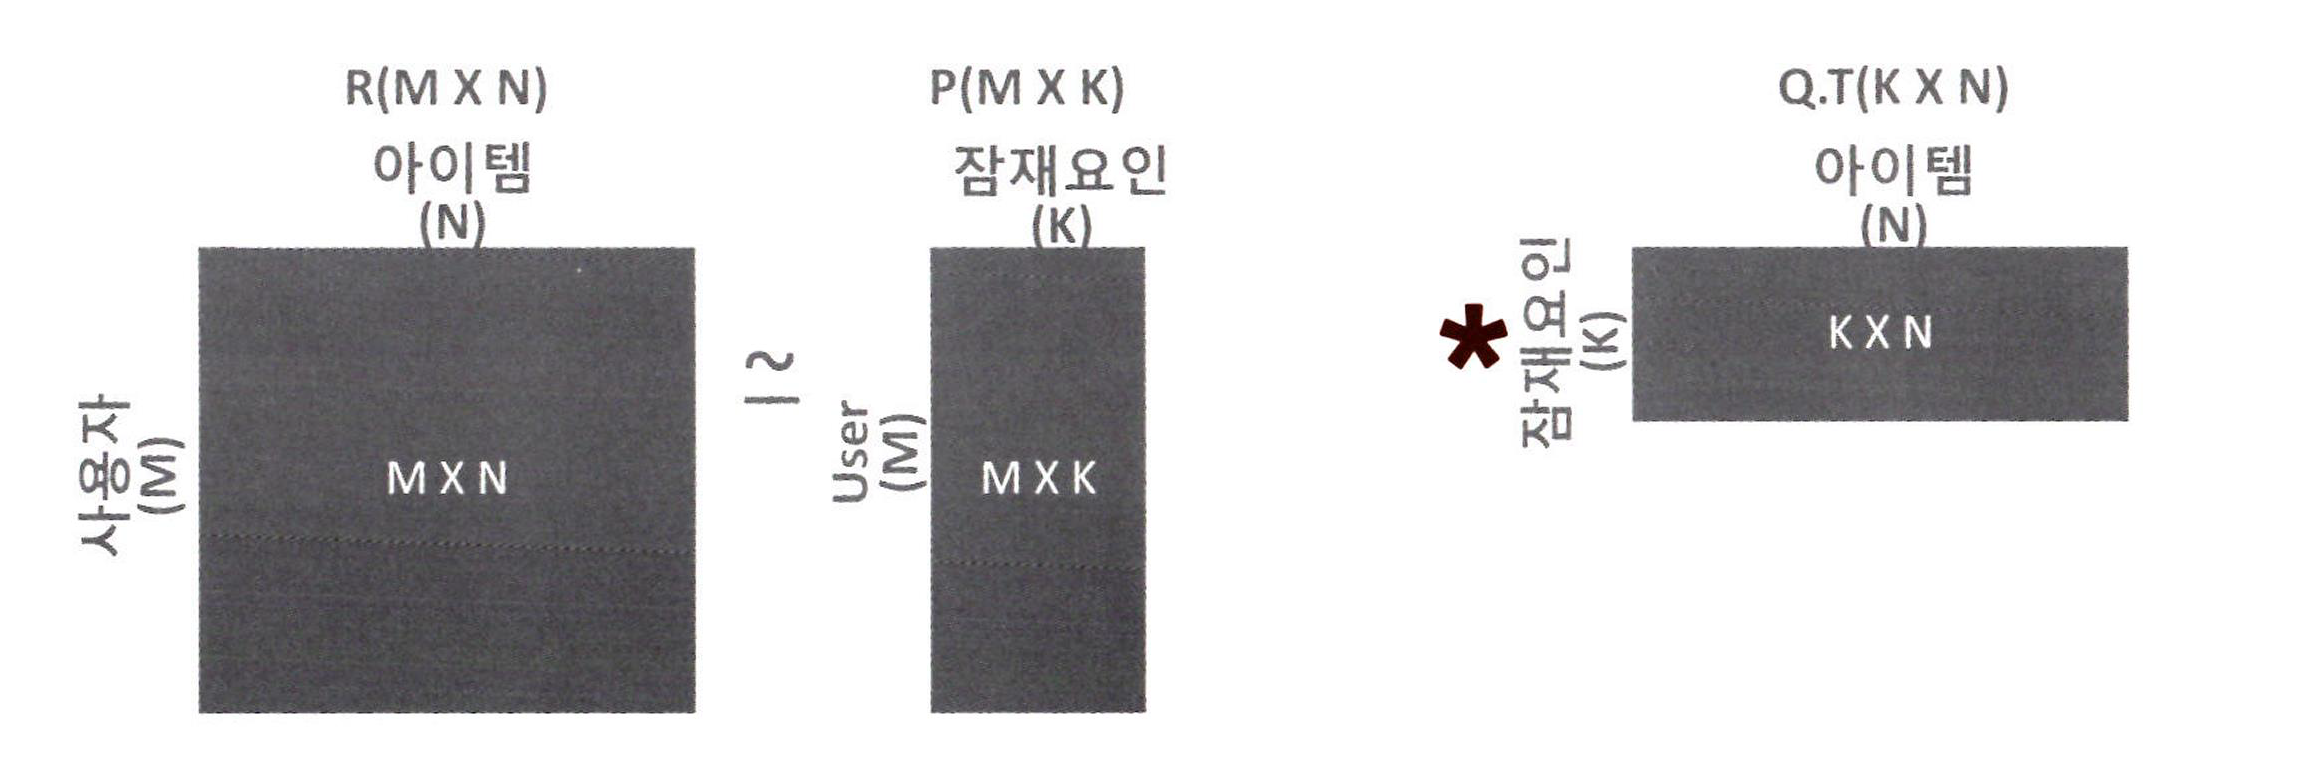

$$ R = P * Q.T $$

* $M$은 총 사용자 수
* $N$은 총 아이템 수 
* $K$는 잠재 요인의 차원 수 
* $R$은 M X N 차원의 사용자 - 아이템 평점 행렬
* $P$는 사용자와 잠재 요인과의 관계 값을 가지는 M X K 차원의 사용자 - 잠재 요인의 행렬
* $Q$는 아이템과 잠재 요인과의 관계 값을 가지는 N X K 차원의 아이템 - 잠재 요인 행렬
* $Q.T$는 Q 매트릭스의 행과 열 값을 교환한 전치 행렬

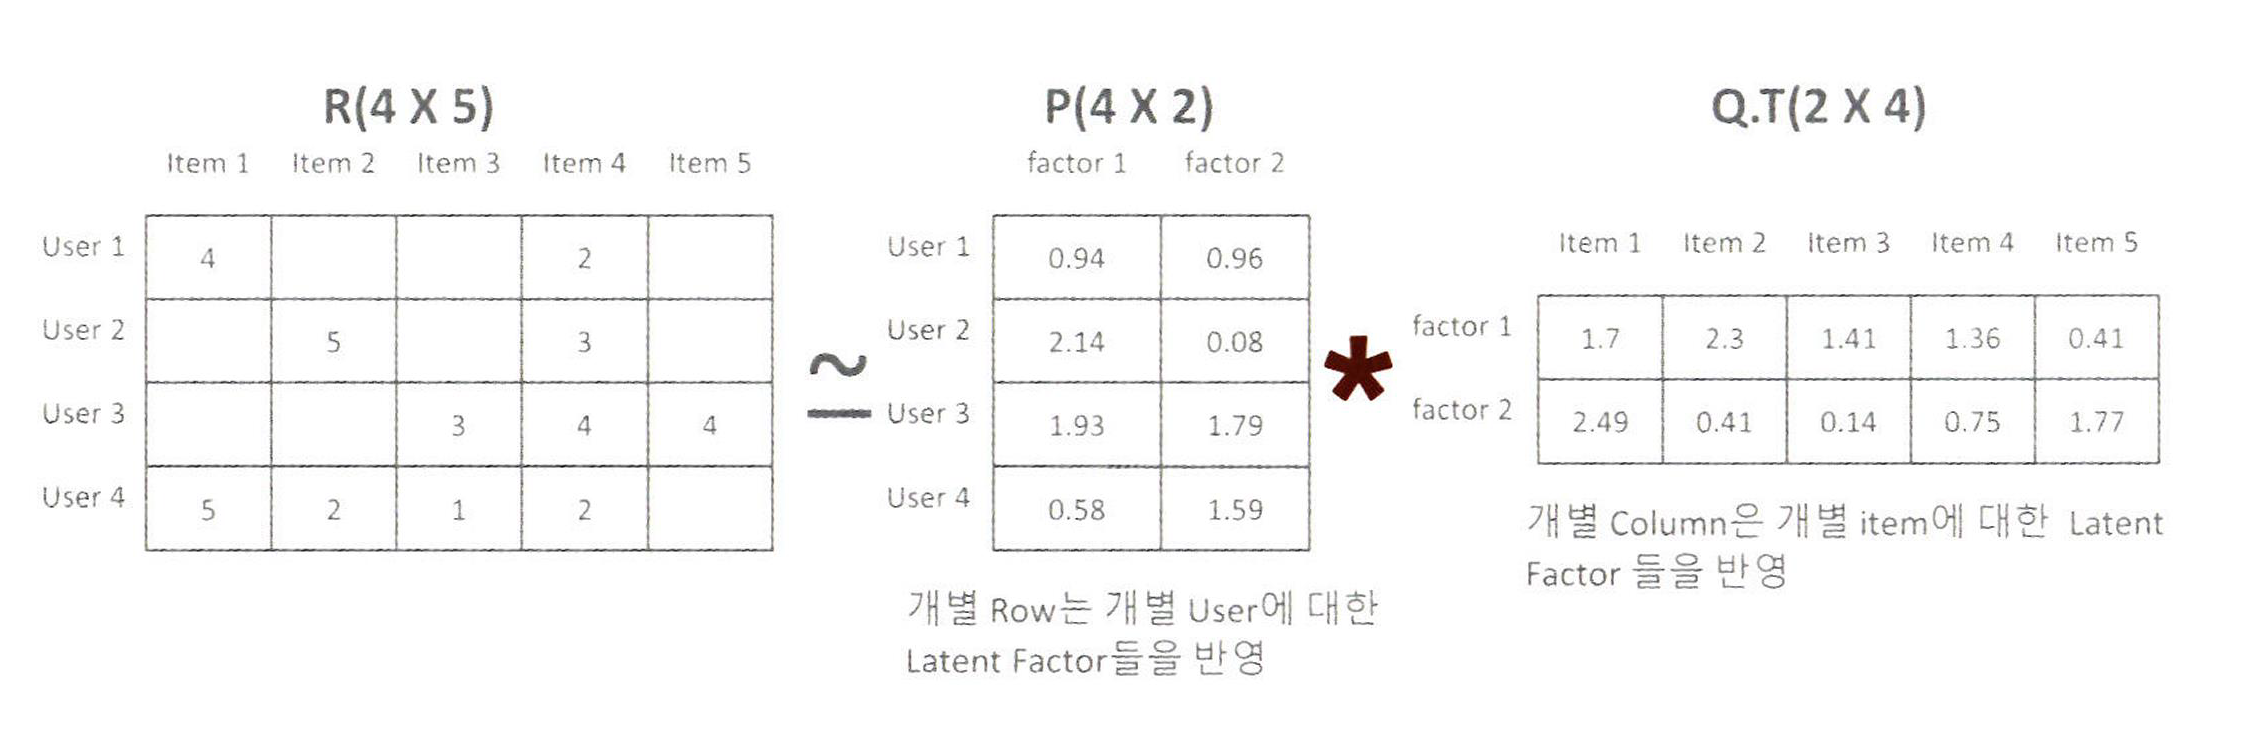

-> 행렬 내에 **NaN** 값을 많이 가지는 고차원의 희소 행렬 R은 다음과 같이 **저차원의 밀집 행렬인 P**와 **Q 행렬**로 분해될 수 있음

$$ r_{(u,i)} = p_u * q^{t}_i$$

* R행렬의 u행 사용자와 i열 아이템 위치에 있는 평점 데이터


### 3. 확률적 경사 하강법을 이용한 행렬 분해

: P와 Q행렬로 계산된 **예측 R 행렬 값**이 **실제 R 행렬 값**과 가장 최소의 오류를 가질 수 있도록 반복적인 비용함수 최적화를 통해 **P와 Q를 유추해내는 것**

```
1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트
4. 만족할 만한 오류값을 가질 때까지 2,3번 작업을 반복하면서 P와 Q값을 업데이트해 근사화
```

* **SGD를 이용해 행렬 분해를 수행하는 예제**
  * 분해하려는 원본 행렬 R을 P와 Q로 분해한 뒤 다시 P와 Q.T의 내적으로 예측 행렬을 만드는 예제

In [1]:
import numpy as np

#원본 행렬 R 생성
R = np.array([[4,np.NaN, np.NaN, 2, np.NaN],
              [np.NaN,5,np.NaN,3,1],
              [np.NaN,np.NaN,3,4,4],
              [5,2,1,2,np.NaN]]
             )

num_users, num_items = R.shape
K = 3

#P와 Q행렬의 크기를 지저하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale = 1./K, size = (num_users,K))
Q = np.random.normal(scale =1./K, size = (num_items, K))

In [3]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeors) :
  error = 0
  full_pred_matrix = np.dot(P,Q.T)

  x_non_zero_ind = [non_zero[0] for non_zero in non_zeors]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeors]
  R_non_zeors = R[x_non_zero_ind,y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind,y_non_zero_ind]
  mse = mean_squared_error(R_non_zeors,full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

* **SGD**기반으로 행렬 분해 수행
  * `steps` : SGD를 반복해서 업데이트할 횟수
  * `learning_rate` : SGD의 학습률
  * `r_lambda` : L2 Regularization


In [4]:
# R>0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [ (i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

#SGD기법

for step in range(steps) :
  for i,j,r in non_zeros :
    #실제 값과 예측 값의 차이 구함
    eij = r - np.dot(P[i,:], Q[j,:].T)
    P[i,:] = P[i,:] + learning_rate*(eij * Q[j,:] - r_lambda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij * P[i,:] - r_lambda*Q[j,:])
    rmse = get_rmse(R,P,Q,non_zeros)
    if (step % 50) == 0 :
      print('### iteration step : ',step, 'rmse : ',rmse)
    

### iteration step :  0 rmse :  3.261355059488935
### iteration step :  0 rmse :  3.26040057174686
### iteration step :  0 rmse :  3.253984404542389
### iteration step :  0 rmse :  3.2521583839863624
### iteration step :  0 rmse :  3.252335303789125
### iteration step :  0 rmse :  3.251072196430487
### iteration step :  0 rmse :  3.2492449982564864
### iteration step :  0 rmse :  3.247416477570409
### iteration step :  0 rmse :  3.241926055455223
### iteration step :  0 rmse :  3.2400454107613084
### iteration step :  0 rmse :  3.240166740749792
### iteration step :  0 rmse :  3.2388050277987723
### iteration step :  50 rmse :  0.5003190892212748
### iteration step :  50 rmse :  0.5001616291326989
### iteration step :  50 rmse :  0.49899601202578087
### iteration step :  50 rmse :  0.4988483450145831
### iteration step :  50 rmse :  0.49895189256631756
### iteration step :  50 rmse :  0.49833236830090993
### iteration step :  50 rmse :  0.4984148489378701
### iteration step :  50 rmse 

In [5]:
pred_matrix = np.dot(P,Q.T)
print('예측 행렬 : \n', np.round(pred_matrix, 3))

예측 행렬 : 
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
